In [3]:
#saving files & images in drive folder
from google.colab import drive
from pathlib import Path

drive.mount("/content/drive")

BASE_DIR = Path("/content/drive/MyDrive/satellite-property-valuation")

for p in [
    BASE_DIR / "data/raw",
    BASE_DIR / "data/processed",
    BASE_DIR / "data/images",
    BASE_DIR / "notebooks",
    BASE_DIR / "src",
]:
    p.mkdir(parents=True, exist_ok=True)

print("Saved project structure to Google Drive")


Mounted at /content/drive
Saved project structure to Google Drive


In [4]:
#imports
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# project root (works in Colab & local)
BASE_DIR = Path.cwd()
if BASE_DIR.name == "notebooks":
    BASE_DIR = BASE_DIR.parent

BASE_DIR


PosixPath('/content')

In [6]:
# Paths to training and test CSV files
train_file = BASE_DIR / "/content/drive/MyDrive/satellite-property-valuation/data/raw/train_data.csv"
test_file  = BASE_DIR / "/content/drive/MyDrive/satellite-property-valuation/data/raw/test_data.csv"

# Load datasets
df_train = pd.read_csv(train_file)
df_test  = pd.read_csv(test_file)

# Check shapes
print("Train:", df_train.shape)
print("Test :", df_test.shape)



Train: (16209, 21)
Test : (5404, 20)


In [7]:
df_train.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [8]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [9]:
df_train.isna().sum()


,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


Distribution of House Prices

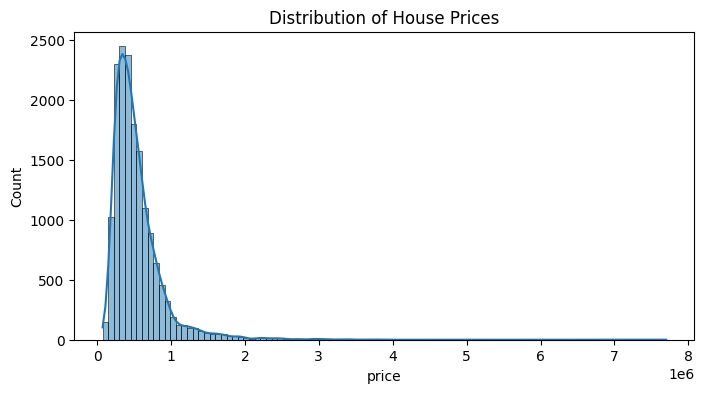

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(df_train["price"], bins=100, kde=True)
plt.title("Distribution of House Prices")
plt.show()


In [11]:
df_train[["lat", "long"]].describe()


,lat,long
count,16209.000000,16209.000000
mean,47.560707,-122.214003
std,0.138340,0.140093
min,47.159300,-122.519000
25%,47.472500,-122.328000
50%,47.572400,-122.230000
75%,47.678200,-122.125000
max,47.777600,-121.315000


Spatial Distribution of Properties by Living Area

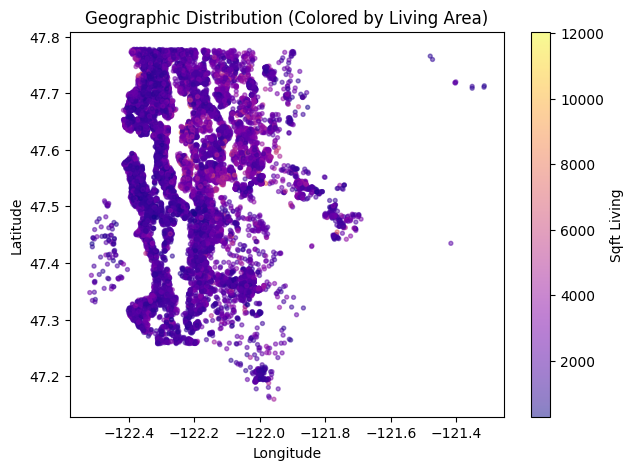

In [12]:
plt.figure(figsize=(7,5))

plt.scatter(
    x=df_train["long"],
    y=df_train["lat"],
    c=df_train["sqft_living"],
    cmap="plasma",
    s=8,
    alpha=0.5
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution (Colored by Living Area)")
plt.colorbar(label="Sqft Living")
plt.show()



In [13]:
df_train["price_group"] = pd.qcut(
    df_train["price"],
    q=10,
    labels=False
)

df_train["price_group"].value_counts().sort_index()


,count
price_group,
0,1654
1,1588
2,1623
3,1633
4,1665
5,1562
6,1628
7,1653
8,1582


Prices are split into 10 equally sized groups.

price_group = 0 → lowest price range

price_group = 9 → highest price range

In [14]:
IMAGES_PER_BUCKET = 550
SEED = 21

# Sample a fixed number of properties from each price group
image_sample = (
    df_train
    .groupby("price_group", group_keys=False)
    .apply(lambda x: x.sample(IMAGES_PER_BUCKET, random_state=SEED))
)

image_sample.shape


/tmp/ipython-input-3872388911.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(IMAGES_PER_BUCKET, random_state=SEED))


(5500, 22)

In [15]:

image_sample.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_group'],
      dtype='object')

Price Distribution

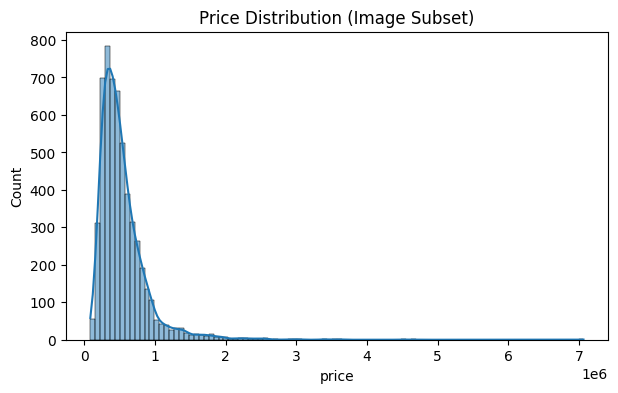

In [16]:
plt.figure(figsize=(7,4))
sns.histplot(image_sample["price"], bins=100, kde=True)
plt.title("Price Distribution (Image Subset)")
plt.show()


Price Density Comparision

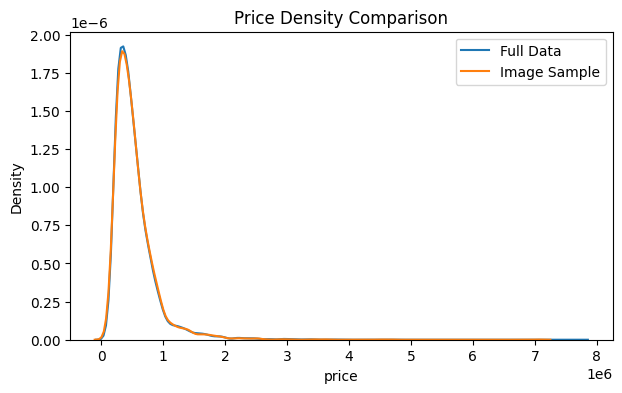

In [17]:
plt.figure(figsize=(7,4))
sns.kdeplot(df_train["price"], label="Full Data")
sns.kdeplot(image_sample["price"], label="Image Sample")
plt.legend()
plt.title("Price Density Comparison")
plt.show()


In [18]:
# Save the sampled dataset used for image-based modeling
processed_path = "/content/drive/MyDrive/satellite-property-valuation/data/processed/train_with_images.csv"

image_sample.drop(columns=["price_group"]).to_csv(
    processed_path,
    index=False
)

print(f"Saved → {processed_path}")



Saved → /content/drive/MyDrive/satellite-property-valuation/data/processed/train_with_images.csv


Relationship Between Living Area and Property Price

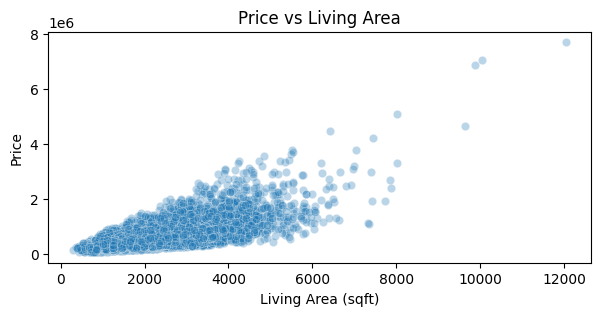

In [19]:
plt.figure(figsize=(7,3))
sns.scatterplot(
    x=df_train["sqft_living"],
    y=df_train["price"],
    alpha=0.3
)
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")
plt.title("Price vs Living Area")
plt.show()


Impact of Waterfront Presence on Property Prices

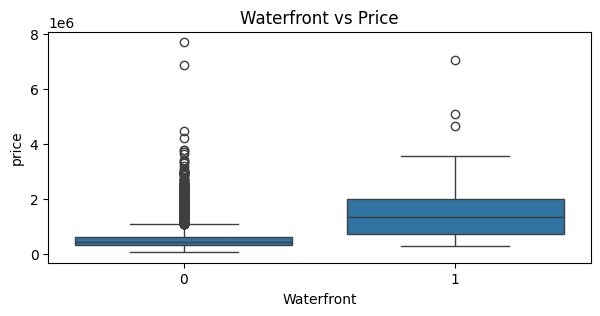

In [20]:
plt.figure(figsize=(7,3))
sns.boxplot(
    x=df_train["waterfront"],
    y=df_train["price"]
)
plt.xlabel("Waterfront")
plt.title("Waterfront vs Price")
plt.show()


Effect of View Quality on Property Prices

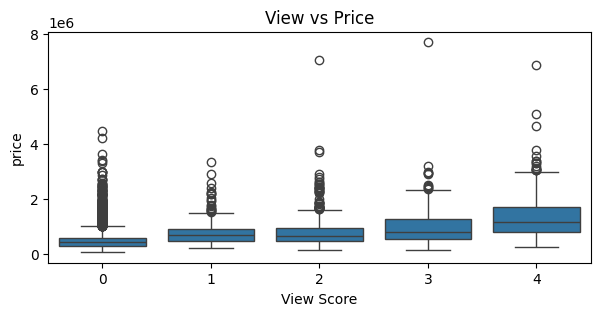

In [21]:
plt.figure(figsize=(7,3))
sns.boxplot(
    x=df_train["view"],
    y=df_train["price"]
)
plt.xlabel("View Score")
plt.title("View vs Price")
plt.show()


Geographic Patterns in Average Housing Prices

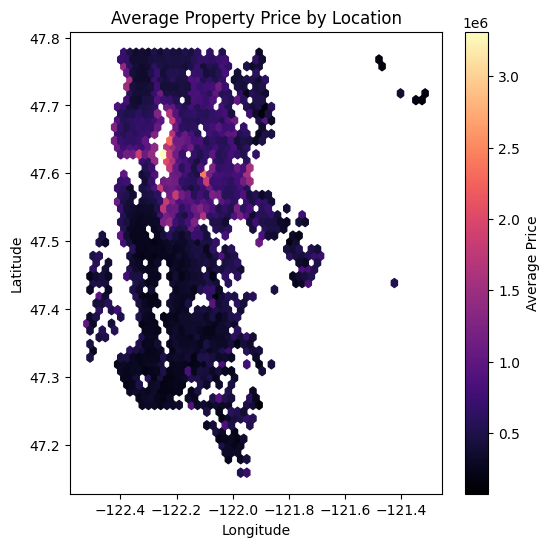

In [22]:
plt.figure(figsize=(6,6))

hb = plt.hexbin(
    df_train["long"],
    df_train["lat"],
    C=df_train["price"],
    gridsize=55,
    reduce_C_function=np.mean,
    cmap="magma",
    mincnt=1
)

plt.colorbar(hb, label="Average Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Average Property Price by Location")
plt.show()



In [23]:
# Remove non-feature columns and save tabular-only dataset
clean_tabular = df_train.drop(columns=["id", "date"])

tabular_path = "/content/drive/MyDrive/satellite-property-valuation/data/processed/train_tabular.csv"
clean_tabular.to_csv(tabular_path, index=False)

print("Tabular dataset saved")


Tabular dataset saved


In [24]:
from pathlib import Path

img_df = pd.read_csv(processed_path)

# match filename format (with .0)
img_df["id"] = img_df["id"].astype(float)

IMG_DIR = Path("/content/drive/MyDrive/satellite-property-valuation/data/images")

img_df["img_path"] = img_df["id"].apply(
    lambda x: IMG_DIR / f"{x}.png"
)
img_df[["id", "img_path"]].head()

,id,img_path
0,1.105001e+09,/content/drive/MyDrive/satellite-property-valu...
1,3.990002e+08,/content/drive/MyDrive/satellite-property-valu...
2,5.220593e+08,/content/drive/MyDrive/satellite-property-valu...
3,1.061400e+09,/content/drive/MyDrive/satellite-property-valu...
4,1.099600e+09,/content/drive/MyDrive/satellite-property-valu...


Setting Mapbox API Token for Satellite Image Access

In [25]:
import os

os.environ["MAPBOX_TOKEN"] = "pk.eyJ1Ijoic2FjaGluamFnYXJ3YWwiLCJhIjoiY21qeno1NGM2MHN1bTNmc2NhZG54d2R6eiJ9.q4Btf1daLxcQ7Bv3dDIosA"


In [26]:
print(os.getenv("MAPBOX_TOKEN")[:10], "...")


pk.eyJ1Ijo ...


Accesing data_fetcher file from src folder

In [27]:
!ls /content/drive/MyDrive/satellite-property-valuation/src


data_fetchers.py  __pycache__


In [28]:
import sys
sys.path.append("/content/drive/MyDrive/satellite-property-valuation/src")


Generating Satellite Images from Coordinates

In [29]:
from data_fetchers import run_image_collection

run_image_collection()


🚀 Initializing satellite image fetcher
→ Reading input CSV: /content/drive/MyDrive/satellite-property-valuation/data/processed/train_with_images.csv
→ Saving images to: /content/drive/MyDrive/satellite-property-valuation/data/images
Records loaded: 5500
Duplicates removed: 12
Latitude bounds : 47.1776 → 47.7776
Longitude bounds: -122.511 → -121.316
📥 Starting downloads...
✅ Finished. Images downloaded: 0


In [30]:
img_df["exists"] = img_df["img_path"].apply(lambda p: p.exists())
img_df["exists"].value_counts()


,count
exists,
True,5500


In [31]:
img_df = img_df[img_df["exists"]].reset_index(drop=True)
img_df.shape


(5500, 23)

Visual Comparison of Low- and High-Priced Neighborhoods

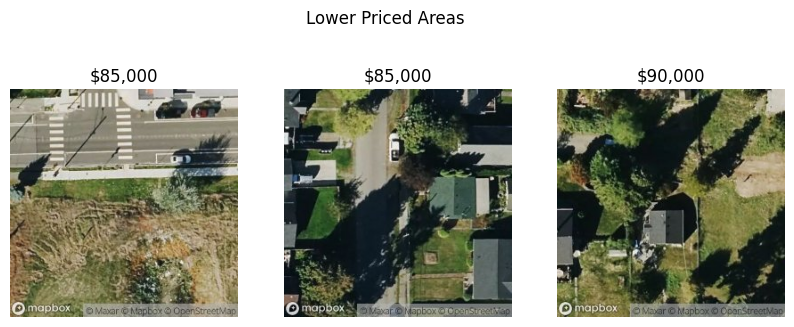

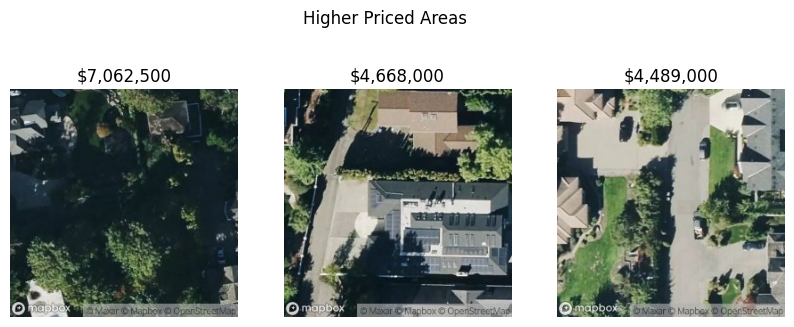

In [32]:
from PIL import Image

low_price  = img_df.nsmallest(3, "price")
high_price = img_df.nlargest(3, "price")

def display_samples(df, title):
    plt.figure(figsize=(10,4))
    for idx, row in enumerate(df.itertuples()):
        img = Image.open(row.img_path)
        plt.subplot(1, len(df), idx+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"${row.price:,}")
    plt.suptitle(title)
    plt.show()

display_samples(low_price, "Lower Priced Areas")
display_samples(high_price, "Higher Priced Areas")
